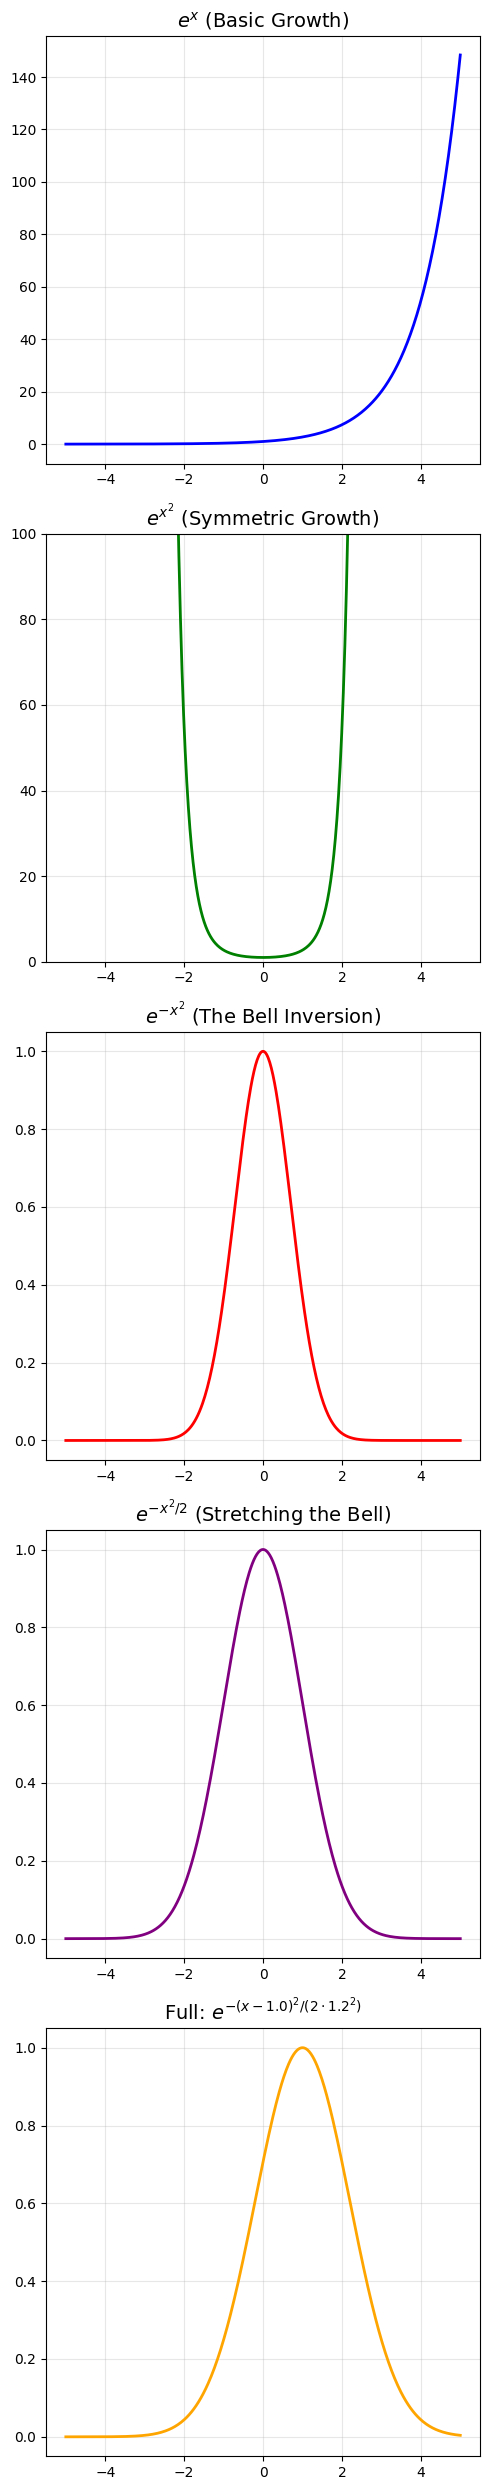

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup the domain (x-axis)
x = np.linspace(-5, 5, 500)

# Create a figure with 5 subplots in a row
fig, axes = plt.subplots(5, 1, figsize=(5, 25))

# Plot 1: Plain exponential function
y1 = np.exp(x)
axes[0].plot(x, y1, color='blue', lw=2)
axes[0].set_title(r'$e^x$ (Basic Growth)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Plot 2: Exponential with a squared value
# This makes the function symmetric (positive and negative x yield same result)
y2 = np.exp(x**2)
axes[1].plot(x, y2, color='green', lw=2)
axes[1].set_title(r'$e^{x^2}$ (Symmetric Growth)', fontsize=14)
axes[1].set_ylim(0, 100) # Limit y as it grows extremely fast
axes[1].grid(True, alpha=0.3)

# Plot 3: Exponential with a negative squared value
# The negative sign "flips" the growth into the classic "Bell" shape
y3 = np.exp(-(x**2))
axes[2].plot(x, y3, color='red', lw=2)
axes[2].set_title(r'$e^{-x^2}$ (The Bell Inversion)', fontsize=14)
axes[2].grid(True, alpha=0.3)

# Plot 4: Exponential with division
# Dividing the exponent "stretches" the bell horizontally
y4 = np.exp(-(x**2) / 2)
axes[3].plot(x, y4, color='purple', lw=2)
axes[3].set_title(r'$e^{-x^2 / 2}$ (Stretching the Bell)', fontsize=14)
axes[3].grid(True, alpha=0.3)

# Plot 5: The Full Exponential Component (with mu and sigma)
# (x-mu) shifts the peak, and sigma^2 controls the final width
mu = 1.0    # Mean (center)
sigma = 1.2 # Standard deviation (spread)
y5 = np.exp(-((x - mu)**2) / (2 * sigma**2))
axes[4].plot(x, y5, color='orange', lw=2)
axes[4].set_title(f'Full: $e^{{-(x-{mu})^2 / (2 \cdot {sigma}^2)}}$', fontsize=14)
axes[4].grid(True, alpha=0.3)

plt.tight_layout()

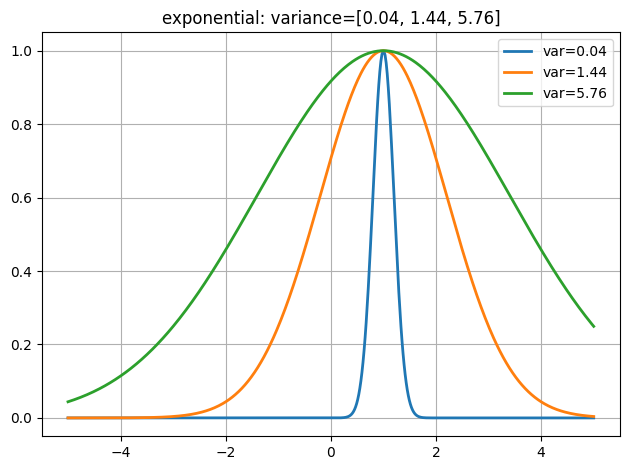

In [ ]:
# comparison of three variance values
mu = 1.0
vars = []
for sigma in [0.2, 1.2, 2.4]:
    var = round(sigma**2, 2)
    vars.append(var)
    y = np.exp(-((x - mu)**2) / (2 * var))
    plt.plot(x, y, label=f"var={var}", lw=2)
plt.title(f'exponential: variance={vars}')
plt.legend()
plt.grid()
plt.tight_layout()


0.204081632653061


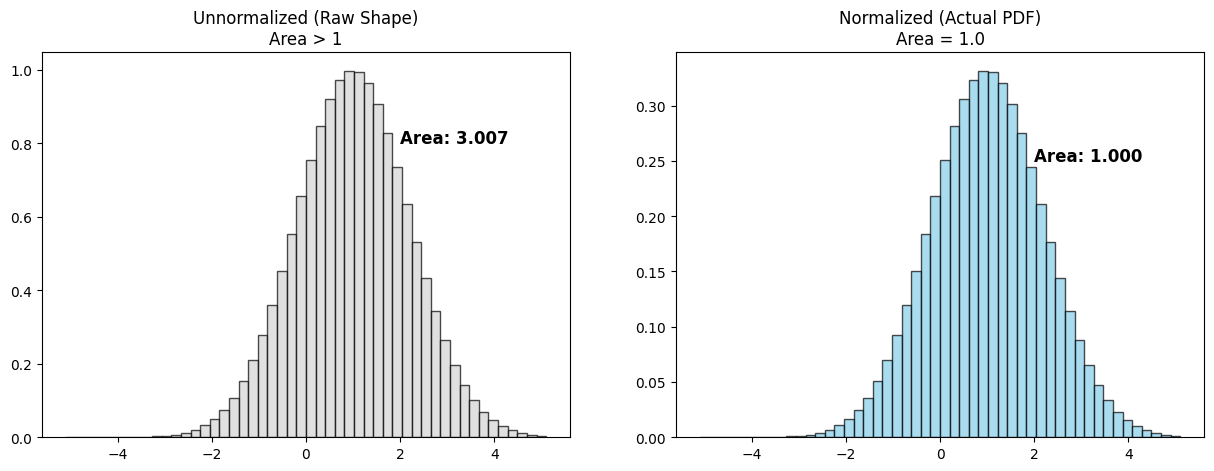

In [2]:
# Unnormalised vs normalised distributions
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 1, 1.2
num_bins = 50
x = np.linspace(-5, 5, num_bins)
dx = x[1] - x[0]
print(dx)
# 1. Unnormalized exponential part
y_unnorm = np.exp(-((x - mu)**2) / (2 * sigma**2))

# 2. Normalized PDF
normalization_factor = 1 / (np.sqrt(2 * np.pi * sigma**2))
y_norm = y_unnorm * normalization_factor

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Unnormalized
ax1.bar(x, y_unnorm, width=dx, color='lightgray', edgecolor='black', alpha=0.7)
ax1.set_title("Unnormalized (Raw Shape)\nArea > 1")
ax1.annotate(f'Area: {np.sum(y_unnorm)*dx:.3f}', xy=(2, 0.8), fontsize=12, fontweight='bold')

# Plotting Normalized
ax2.bar(x, y_norm, width=dx, color='skyblue', edgecolor='black', alpha=0.7)
ax2.set_title("Normalized (Actual PDF)\nArea = 1.0")
ax2.annotate(f'Area: {np.sum(y_norm)*dx:.3f}', xy=(2, 0.25), fontsize=12, fontweight='bold')

plt.show()

probability of waiting time is 60 minutes: 3.32%
probability of waiting time is 90 minutes: 0.15%


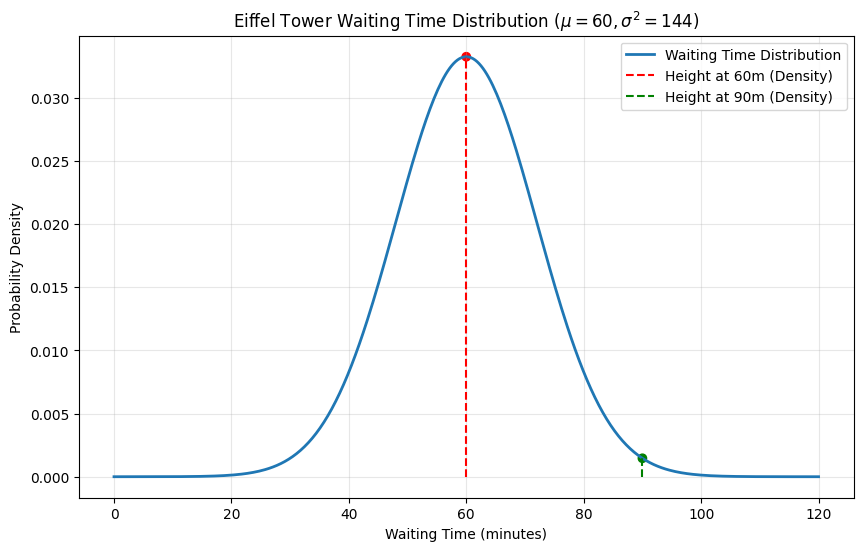

In [17]:
# Eiffel Tower waiting time example
import numpy as np
import matplotlib.pyplot as plt

mu, var = 60, 144
num_bins = 360
x = np.linspace(0, 120, num_bins)

def normal_pdf(x, mu, var):
    return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-((x - mu)**2) / (2 * var))

# The shape of the normal distribution with mean 60 and variance 144
y = normal_pdf(x, mu, var)

# Calculate heights (Densities) for 60 and 90 minutes
y60 = normal_pdf(60, mu, var)
y90 = normal_pdf(90, mu, var)

print(f"probability of waiting time is 60 minutes: {y60*100:.2f}%")
print(f"probability of waiting time is 90 minutes: {y90*100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=2, label='Waiting Time Distribution')

# Draw vertical lines to indicate the points
plt.vlines(x=60, ymin=0, ymax=y60, colors='red', linestyles='--', label=f'Height at 60m (Density)')
plt.vlines(x=90, ymin=0, ymax=y90, colors='green', linestyles='--', label=f'Height at 90m (Density)')

# Add dots on the curve
plt.scatter([60, 90], [y60, y90], color=['red', 'green'])

plt.title("Eiffel Tower Waiting Time Distribution ($\mu=60, \sigma^2=144$)")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)

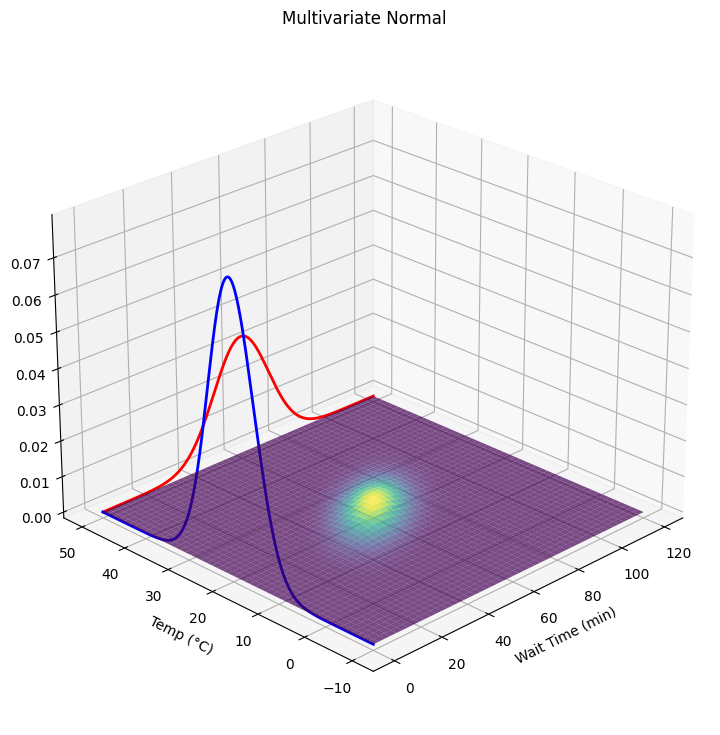

In [27]:
# Multivariate normal distribution example
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Parameters
mu_x, var_x = 60, 144
mu_y, var_y = 20, 25
sigma_x, sigma_y = np.sqrt(var_x), np.sqrt(var_y)

# 1. setup data (500 data points each)
# wait time
x = np.linspace(0, 120, 500)
# temperature
y = np.linspace(-10, 50, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 2. covariance and covariance matrix
# we don't have real data points here, so use this
# \text{Cov}(X, Y) = \rho_{XY} \cdot \sigma_X \cdot \sigma_Y
# correlation of x and y is 0.6
# you can experiment with different values of correlation
#   0.0: no correlation -> circle
#   0.9: strong correlation -> skinny ellipse
rho = 0.6
cov_value = rho * sigma_x * sigma_y
sigma_matrix = [[var_x, cov_value],
                [cov_value, var_y]]

# 3. Joint PDF with correlation
rv = multivariate_normal([mu_x, mu_y], sigma_matrix)
Z = rv.pdf(pos)

# 4. Plotting
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot surface (notice the diagonal 'tilt')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot Marginals on the walls (these don't change, but the joint peak does)
ax.plot(x, np.full_like(x, y.max()), norm.pdf(x, mu_x, sigma_x), color='red', lw=2)
ax.plot(np.full_like(y, x.min()), y, norm.pdf(y, mu_y, sigma_y), color='blue', lw=2)

ax.set_xlabel('Wait Time (min)')
ax.set_ylabel('Temp (°C)')
ax.set_title(f'Multivariate Normal')
ax.view_init(elev=25, azim=-135)
